<a href="https://colab.research.google.com/github/qus0in/230627_VideoGameSales/blob/main/230627_Video_Game_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"Video Game Sales" (비디오 게임 판매 데이터): 이 데이터셋은 전 세계적으로 발매된 비디오 게임의 판매 정보를 담고 있습니다. 게임 플랫폼, 장르, 출시 연도 등을 기반으로 다양한 시각화를 통해 비디오 게임 시장 동향과 인기 게임을 분석할 수 있습니다.

https://www.kaggle.com/gregorut/videogamesales

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/qus0in/230627_VideoGameSales/main/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


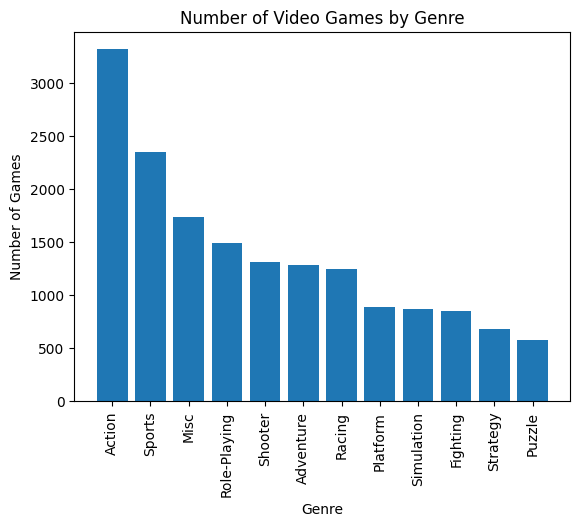

In [4]:
#@title 막대그래프

genre_counts = df['Genre'].value_counts().sort_values(ascending=False)

plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.title('Number of Video Games by Genre')
plt.xticks(rotation=90)
plt.show()

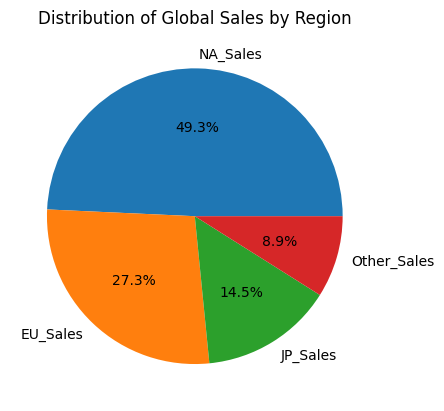

In [6]:
#@title 원 그래프

region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%')
plt.title('Distribution of Global Sales by Region')
plt.show()

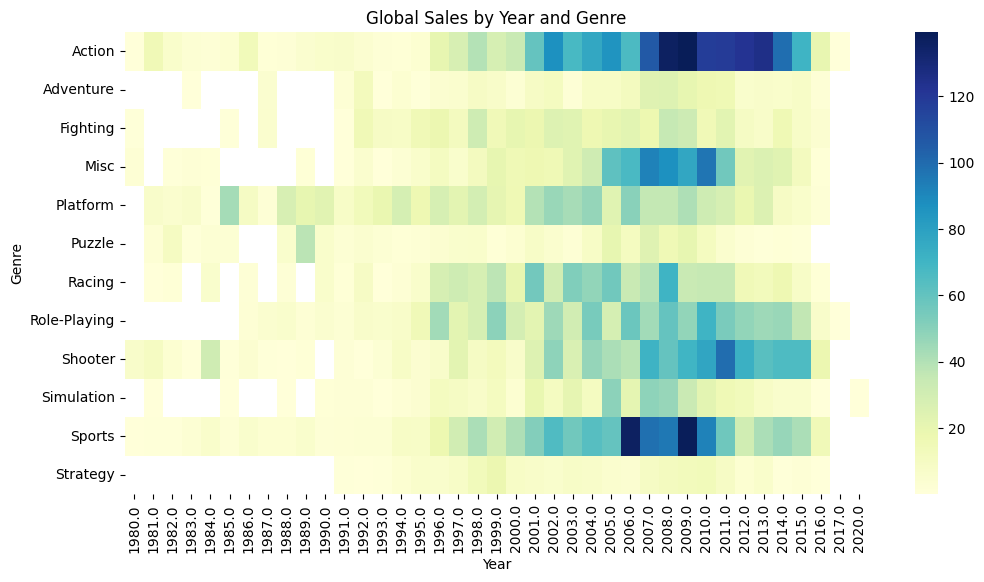

In [7]:
#@title 히트맵

sales_by_year_genre = df.pivot_table(index='Genre', columns='Year', values='Global_Sales', aggfunc='sum')

plt.figure(figsize=(12, 6))
sns.heatmap(sales_by_year_genre, cmap='YlGnBu')
plt.xlabel('Year')
plt.ylabel('Genre')
plt.title('Global Sales by Year and Genre')
plt.show()

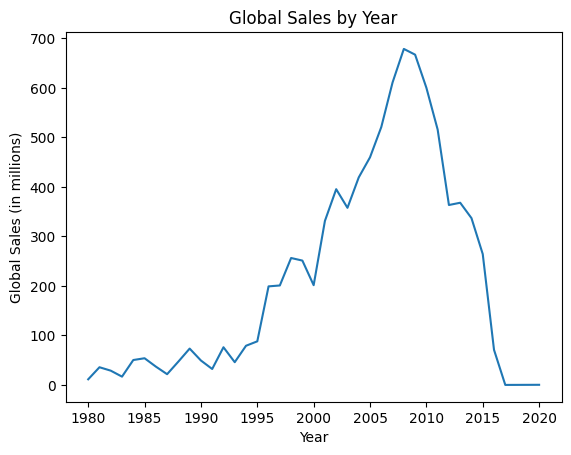

In [9]:
#@title 시계열 그래프
year_sales = df.groupby('Year')['Global_Sales'].sum()

plt.plot(year_sales.index, year_sales.values)
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.title('Global Sales by Year')
plt.show()

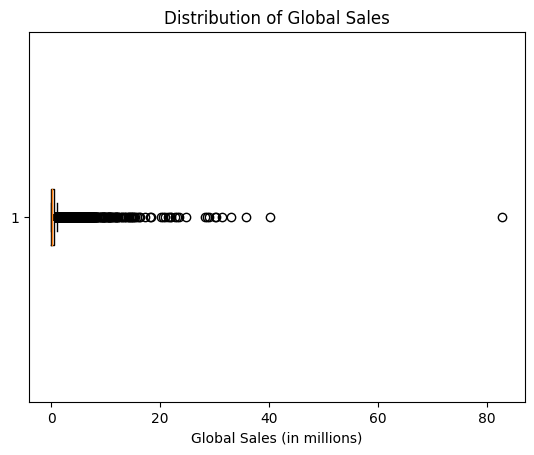

In [10]:
#@title 박스플롯
plt.boxplot(df['Global_Sales'], vert=False)
plt.xlabel('Global Sales (in millions)')
plt.title('Distribution of Global Sales')
plt.show()

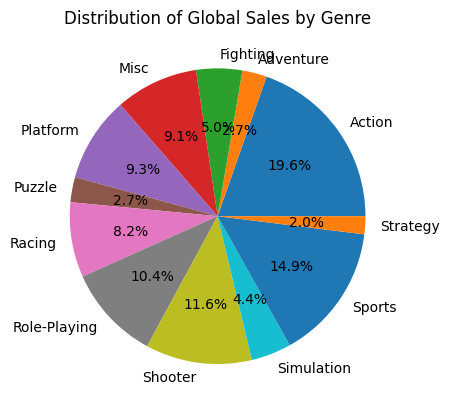

In [19]:
#@title 파이 차트
genre_sales = df.groupby('Genre')['Global_Sales'].sum()

plt.pie(genre_sales, labels=genre_sales.index, autopct='%1.1f%%')
plt.title('Distribution of Global Sales by Genre')
plt.show()